In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#General imports for Plotting and Data manipulation 
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from IPython.display import clear_output
from packaging import version
from datetime import datetime, timedelta

#Sklearn imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


In [3]:
#Import Stock Data
data = pd.read_csv('ISEQ.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,7171.649902,7327.689941,7171.649902,7314.939941,7314.939941,12513300
1,2020-01-03,7314.390137,7314.390137,7186.080078,7242.089844,7242.089844,12690200
2,2020-01-06,7242.419922,7242.419922,7086.930176,7210.640137,7210.640137,16800100
3,2020-01-07,7213.799805,7262.009766,7209.959961,7246.529785,7246.529785,21784500
4,2020-01-08,7238.180176,7238.180176,7173.660156,7211.870117,7211.870117,22861300


In [4]:
# Declare variables that represent the two most important featrures
# Date and Opening Price 

stock_open_prices = data['Open'].astype(np.float32)
stock_dates = data['Date']

stock_open_prices = np.array(stock_open_prices)
stock_dates = np.array(stock_dates)

stock = data.iloc[:, 1:2].values

#Adding day of week Number as feature
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data['dayofweek_num'] = data['Date'].dt.dayofweek  
data['DateIndex'] = np.arange(data.shape[0])

data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,dayofweek_num,DateIndex
0,2020-01-02,7171.649902,7327.689941,7171.649902,7314.939941,7314.939941,12513300,3,0
1,2020-01-03,7314.390137,7314.390137,7186.080078,7242.089844,7242.089844,12690200,4,1
2,2020-01-06,7242.419922,7242.419922,7086.930176,7210.640137,7210.640137,16800100,0,2
3,2020-01-07,7213.799805,7262.009766,7209.959961,7246.529785,7246.529785,21784500,1,3
4,2020-01-08,7238.180176,7238.180176,7173.660156,7211.870117,7211.870117,22861300,2,4


In [5]:

cl = data.iloc[:, 2].values
scl = MinMaxScaler()
#Reshape the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)

In [6]:
#Create a function to process the data into 7 day look back slices 
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

print("cl shape is: ", cl.shape)
#Process the data into the 7 day look back slices
X,y = processData(cl,50)

#Split data into into training and testing and into axes (With 80:20 Split)
X_train, X_test = train_test_split(X, test_size=0.2, shuffle=False)
y_train, y_test = train_test_split(y, test_size=0.2, shuffle=False)

cl2 = data['dayofweek_num']
cl2 = cl2.values.astype('float32')
cl2 = cl2.reshape(cl2.shape[0], 1)
print("cl2 shape is: ",cl2.shape)

X1, y1 = processData(cl2,50)

# Re-do spilt with data representing day number features
X_trainDN, X_testDN = train_test_split(X1, test_size=0.2, shuffle=False)
y_trainDN, y_testDN = train_test_split(y1, test_size=0.2, shuffle=False)

#Stack the training and test feautures 
X_train1 = np.dstack((X_train, X_trainDN))
X_test1 = np.dstack((X_test, X_testDN))

#y_train1 = np.dstack((y_train, y_testDN))
#y_test1 = np.dstack((y_test, y_testDN))

#Print the shapes -> we may need to reshape for training 
print("X train shape is", X_train.shape)
print("X train DN shape is", X_trainDN.shape)
print("X train 1 is: ", X_train1.shape)
print("")

print("X test shape is", X_test.shape)
print("X test DN shape is", X_testDN.shape)
print("X test 1 is: ", X_test1.shape)
print("")

print("y train shape is: ", y_train.shape)
print("y train DN shape: ", y_trainDN.shape)
#print("y train 1 is", y_train1.shape)
print("\n\n")
print("y test shape is",y_test.shape)
print("y test DN is ", y_testDN.shape)
#print("y test 1 is", y_test1.shape)

cl shape is:  (468, 1)
cl2 shape is:  (468, 1)
X train shape is (333, 50)
X train DN shape is (333, 50)
X train 1 is:  (333, 50, 2)

X test shape is (84, 50)
X test DN shape is (84, 50)
X test 1 is:  (84, 50, 2)

y train shape is:  (333,)
y train DN shape:  (333,)



y test shape is (84,)
y test DN is  (84,)


In [10]:
######### Lasso Model ###########

#Polynomial order has already been gotten 
Xpoly = PolynomialFeatures(1).fit_transform(X)
Xpoly1 = PolynomialFeatures(1).fit_transform(X1)



In [11]:
#Split data into traing and testing using Xpoly and Xpoly1 
X_train, X_test = train_test_split(Xpoly, test_size=0.2, shuffle=False)
y_train, y_test = train_test_split(y, test_size=0.2, shuffle=False)

X_trainDN, X_testDN = train_test_split(Xpoly1, test_size=0.2, shuffle=False)
y_trainDN, y_testDN = train_test_split(y1, test_size=0.2, shuffle=False)




In [12]:
X_train1 = np.dstack((X_train, X_trainDN))
X_test1 = np.dstack((X_test, X_testDN))

#y_train1 = np.dstack((y_train, y_testDN))
#y_test1 = np.dstack((y_test, y_testDN))


print("X train shape is", X_train.shape)
print("X train DN shape is", X_trainDN.shape)
print("X train 1 is: ", X_train1.shape)
print("")

print("X test shape is", X_test.shape)
print("X test DN shape is", X_testDN.shape)
print("X test 1 is: ", X_test1.shape)
print("")

print("y train shape is: ", y_train.shape)
print("y train DN shape: ", y_trainDN.shape)
#print("y train 1 is", y_train1.shape)
print("\n\n")
print("y test shape is",y_test.shape)
print("y test DN is ", y_testDN.shape)

X train shape is (333, 51)
X train DN shape is (333, 51)
X train 1 is:  (333, 51, 2)

X test shape is (84, 51)
X test DN shape is (84, 51)
X test 1 is:  (84, 51, 2)

y train shape is:  (333,)
y train DN shape:  (333,)



y test shape is (84,)
y test DN is  (84,)


In [14]:
#Reshape Xtrain1 and Xtest1 so they are 2 dimensional 
X_train1 = X_train1.reshape((X_train1.shape[0],(X_train1.shape[1]*X_train1.shape[2])))

X_test1 = X_test1.reshape((X_test1.shape[0],(X_test1.shape[1]*X_test1.shape[2])))

print(X_train1.shape)
print(X_test1.shape)

#Set the lasso model, the weight has already been gotten 
lasso = Lasso(alpha=0.000001, max_iter=10000)
lasso.fit(X_train1, y_train)

(333, 102)
(84, 102)


Lasso(alpha=1e-06, max_iter=10000)

Prediction Shape is:  (84,)


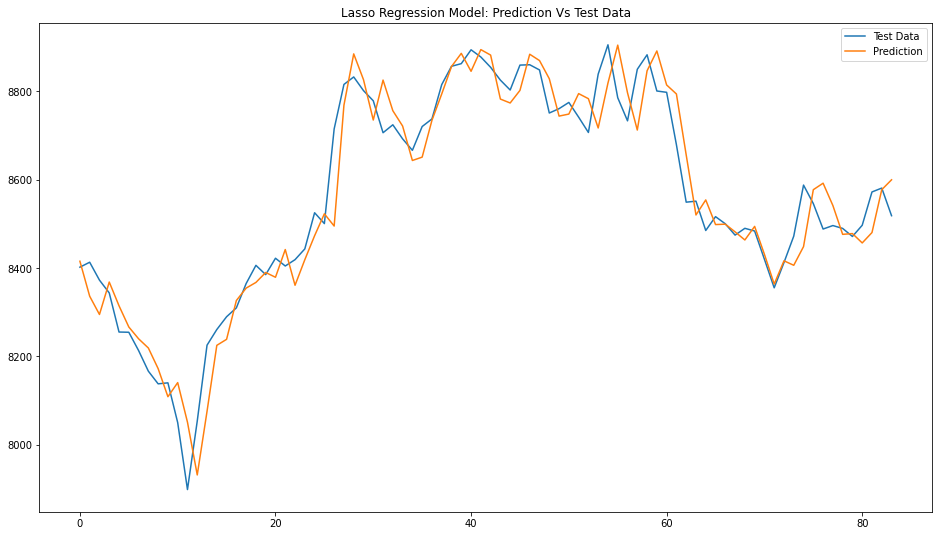

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [15]:
#get a prediction model using the testing data 
lasso_pre = lasso.predict(X_test1)
print("Prediction Shape is: ", lasso_pre.shape)
shape_l = lasso_pre.reshape(-1,1)

#Plot the prediction vs the testing data 
plt.figure(figsize=(16,9))
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)) , label='Test Data')

plt.plot(scl.inverse_transform(shape_l), label='Prediction')
#prediction = scl.inverse_transform(linear_pre)
plt.legend()
plt.title('Lasso Regression Model: Prediction Vs Test Data')
plt.show()
plt.savefig('Lasso_Pre_vs_Test.png')
files.download('Lasso_Pre_vs_Test.png')

In [21]:
#Parameters
print(lasso.coef_)
print("\n\n")
print(lasso.intercept_)
print("\n\n")
lasso_score = lasso.score(X_test1, y_test)
print('Lasso Model score: ', lasso_score)
print("\n\n")
print("Mean Square Error: ", mean_squared_error(y_test, lasso_pre))
print("\n\n")
print("Mean Absolute Error: ", mean_absolute_error(y_test, lasso_pre))
print("\n\n")

[ 0.00000000e+00  0.00000000e+00  7.53850613e-02  5.31867494e-04
 -9.81739847e-02 -1.29561938e-04  2.28209424e-02 -2.35837935e-03
  1.70107837e-02 -5.54118911e-03 -7.82068805e-03 -4.13559003e-03
  4.93034811e-02 -5.60545295e-04 -5.12226991e-02 -1.81136273e-03
  4.34600128e-02 -2.54819654e-03 -3.09358710e-02  3.63318449e-03
 -1.25418735e-01 -1.74543697e-03  7.04173206e-02 -6.23537571e-03
  1.39741946e-02  3.28363586e-03 -4.89962696e-02  2.87171813e-03
  5.87034992e-02 -2.70970289e-03  0.00000000e+00  4.06260233e-03
  2.25468634e-02  2.18009156e-03 -6.53490509e-03 -3.65235597e-03
 -5.27429107e-02 -2.25921976e-03  1.19530534e-01  1.69503898e-04
 -3.33460512e-02 -2.50450964e-03 -3.10586424e-02  4.57012095e-04
  8.24391227e-02  3.39629730e-03 -1.21149920e-01  4.31105407e-03
  7.95970365e-02  2.30757976e-03 -5.16089306e-02  3.72267580e-04
 -3.12252686e-02  8.61235555e-04 -1.56614230e-02 -4.48398958e-03
  6.53382720e-02 -5.08360275e-03  7.34911013e-02 -2.61088762e-03
 -1.09290580e-01  1.80563

In [18]:
#Get Parameters with Training Data
lasso_pred1 = lasso.predict(X_train1)
lasso_score = lasso.score(X_train1, y_train)
print('Lasso Model score: ', lasso_score)
print("\n\n")
print("Mean Square Error: ", mean_squared_error(y_train, lasso_pred1))
print("\n\n")
print("Mean Absolute Error: ", mean_absolute_error(y_train, lasso_pred1))
print("\n\n")

Lasso Model score:  0.9943079307017557



Mean Square Error:  0.00029390393808189237



Mean Absolute Error:  0.012481682372984056





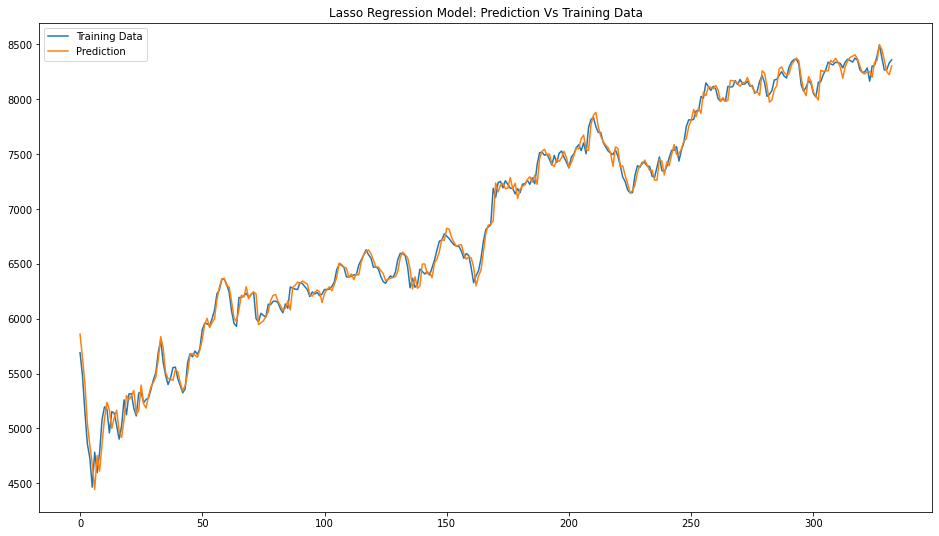

In [23]:
shape_l_2 = lasso_pred1.reshape(-1,1)

#Plot the prediction vs the testing data 
plt.figure(figsize=(16,9))
plt.plot(scl.inverse_transform(y_train.reshape(-1,1)) , label='Training Data')

plt.plot(scl.inverse_transform(shape_l_2), label='Prediction')
#prediction = scl.inverse_transform(linear_pre)
plt.legend()
plt.title('Lasso Regression Model: Prediction Vs Training Data')
plt.show()


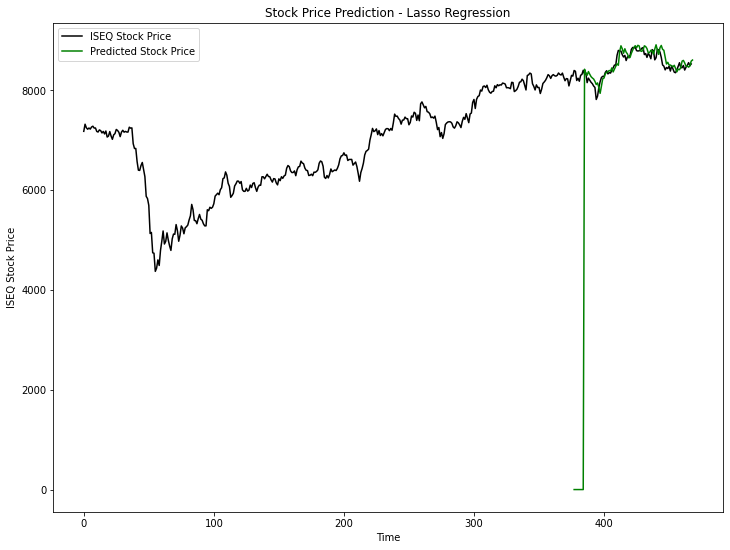

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

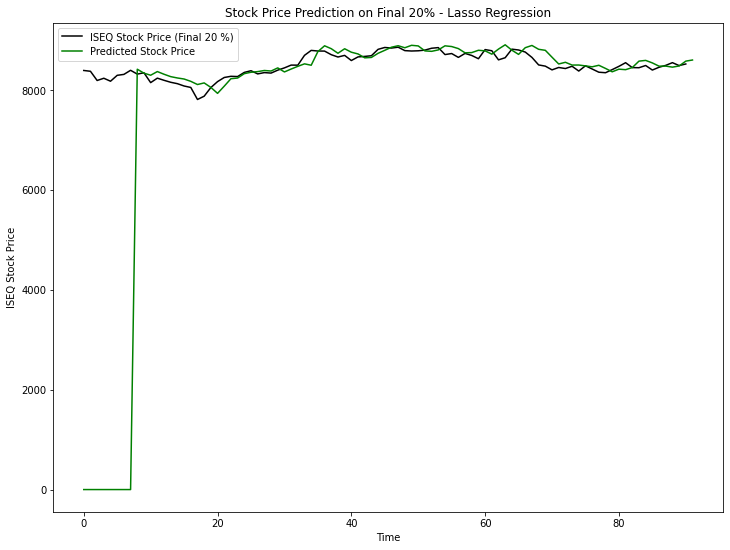

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [37]:
#We visualise the original data vs the Prediction of the final 20% of the stock data
prediction = scl.inverse_transform(shape_l)
prediction_main = np.zeros([469, 1], dtype = float) 
for i in range(0, 377):
    prediction_main[i] = None

for i in range(385, 469):
    prediction_main[i] = prediction[i - 385]

final40 = np.zeros([188, 1], dtype = float) 
for i in range(281, 468):
    final40[i-281] = stock[i]  
    
prediction_main2 = np.zeros([92, 1], dtype = float) 
for i in range(0, 92):
    prediction_main2[i] = prediction_main[i+377]

#plot our model against the opening price 
fig, ax = plt.subplots(figsize=(12,9))
plt.plot(stock, color='black', label='ISEQ Stock Price')
plt.plot(prediction_main, color='green', label='Predicted Stock Price')
plt.title('Stock Price Prediction - Lasso Regression')
#plt.title('Stock Price Prediction after 100 Epochs in training')
plt.xlabel('Time')
plt.ylabel('ISEQ Stock Price')
plt.legend()
plt.show()
plt.savefig('Lasso_Prediction.png')
files.download('Lasso_Prediction.png')


fig, ax = plt.subplots(figsize=(12,9))    
plt.plot(stock[377:469, :], color='black', label='ISEQ Stock Price (Final 20 %)')
plt.plot(prediction_main2, color='green', label='Predicted Stock Price')
plt.title('Stock Price Prediction on Final 20% - Lasso Regression')
plt.xlabel('Time')
plt.ylabel('ISEQ Stock Price')
plt.legend()
plt.show()
plt.savefig('Lasso_20.png')
files.download('Lasso_20.png')

In [19]:
######## Ridge Regression Model ###########

#Weight was already gotten 
ridge = Ridge(alpha=0.000001, max_iter=10000)
ridge.fit(X_train1, y_train)

Ridge(alpha=1e-06, max_iter=10000)

Prediction Shape is:  (84,)


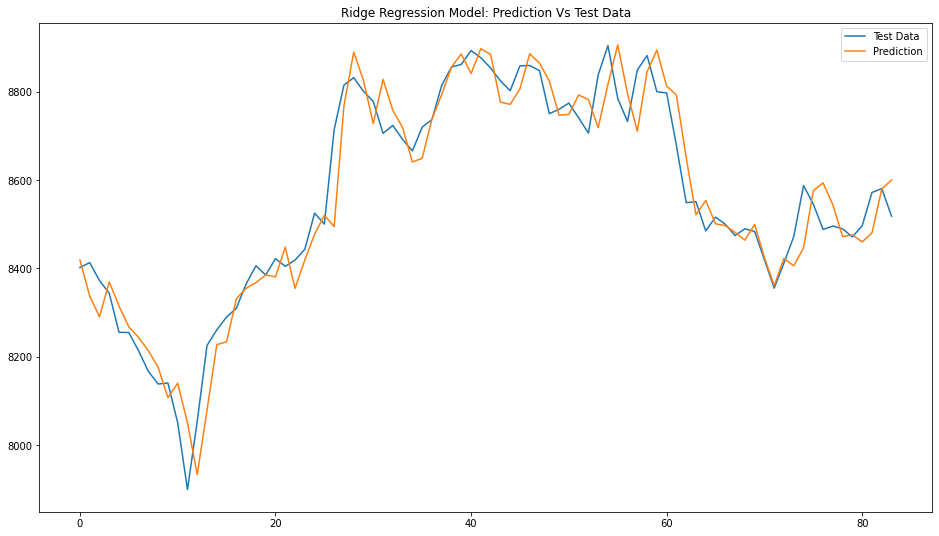

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [20]:
#Get the prediction model 
ridge_pre = ridge.predict(X_test1)
print("Prediction Shape is: ", ridge_pre.shape)
shape_r = ridge_pre.reshape(-1,1)

#Plot the prediction against the test data 
plt.figure(figsize=(16,9))
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)) , label='Test Data')

plt.plot(scl.inverse_transform(shape_r), label='Prediction')
plt.legend()
plt.title('Ridge Regression Model: Prediction Vs Test Data')
plt.show()
plt.savefig('Ridge_Pre_vs_Test.png')
files.download('Ridge_Pre_vs_Test.png')

In [21]:
#Parameters
print(ridge.coef_)
print("\n\n")
print(ridge.intercept_)
print("\n\n")
ridge_score = ridge.score(X_test1, y_test)
print('Ridge Model score: ', ridge_score)
print("\n\n")
print("Mean Square Error: ", mean_squared_error(y_test, ridge_pre))
print("\n\n")
print("Mean Absolute Error: ", mean_absolute_error(y_test, ridge_pre))
print("\n\n")

[ 0.00000000e+00  0.00000000e+00  7.98843144e-02  6.02300227e-04
 -1.06574836e-01 -7.80956664e-06  2.54625687e-02 -2.32749162e-03
  2.86454770e-02 -5.51443352e-03 -3.25719091e-02 -4.05620642e-03
  7.27263610e-02 -6.45447742e-04 -6.64208959e-02 -1.91967054e-03
  5.70137585e-02 -2.55992939e-03 -3.93743991e-02  3.86849552e-03
 -1.33411222e-01 -1.94714415e-03  8.19372538e-02 -6.25829149e-03
  2.55910557e-02  3.42096378e-03 -7.74942026e-02  2.92646978e-03
  7.66456484e-02 -2.94346201e-03 -8.44065734e-03  4.20945963e-03
  4.22192286e-02  2.29688943e-03 -2.46203422e-02 -3.76214136e-03
 -5.87958826e-02 -2.36009689e-03  1.36183592e-01  2.69492453e-04
 -3.86301344e-02 -2.50341720e-03 -4.28442052e-02  3.04248366e-04
  9.98575688e-02  3.41572159e-03 -1.40169890e-01  4.47481590e-03
  1.02655676e-01  2.16516510e-03 -6.18609371e-02  4.06259595e-04
 -3.41608449e-02  1.05406541e-03 -2.39734765e-02 -4.52847321e-03
  7.33666860e-02 -5.12896159e-03  9.13982975e-02 -2.69494341e-03
 -1.25764886e-01  1.95721

In [22]:
#Parameters of training data 
ridge_pred1 = ridge.predict(X_train1)
ridge_score = ridge.score(X_train1, y_train)
print('Ridge Model score: ', lasso_score)
print("\n\n")
print("Mean Square Error: ", mean_squared_error(y_train, ridge_pred1))
print("\n\n")
print("Mean Absolute Error: ", mean_absolute_error(y_train, ridge_pred1))
print("\n\n")

Ridge Model score:  0.9943079307017557



Mean Square Error:  0.0002933186488939357



Mean Absolute Error:  0.012483163520781704





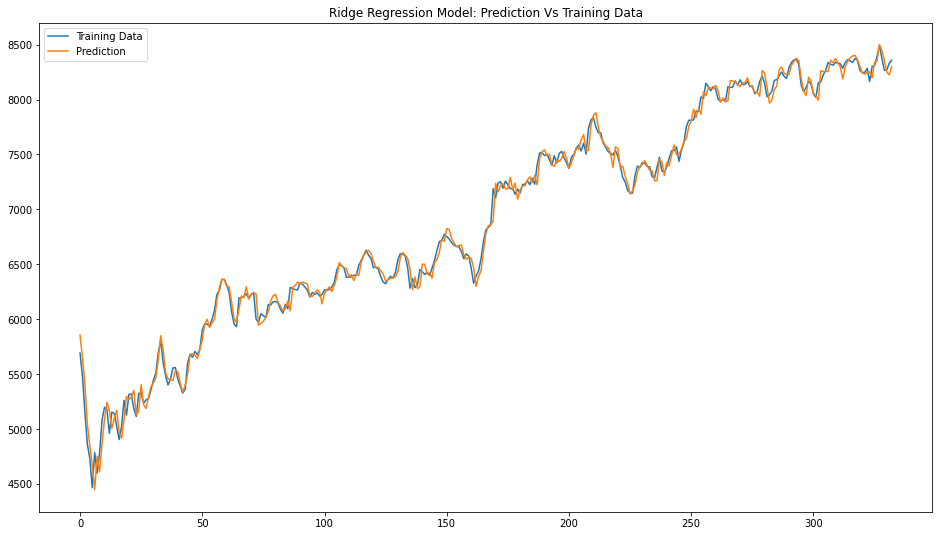

In [24]:
shape_r_2 = ridge_pred1.reshape(-1,1)

#Plot the prediction vs the training data 
plt.figure(figsize=(16,9))
plt.plot(scl.inverse_transform(y_train.reshape(-1,1)) , label='Training Data')

plt.plot(scl.inverse_transform(shape_r_2), label='Prediction')
plt.legend()
plt.title('Ridge Regression Model: Prediction Vs Training Data')
plt.show()

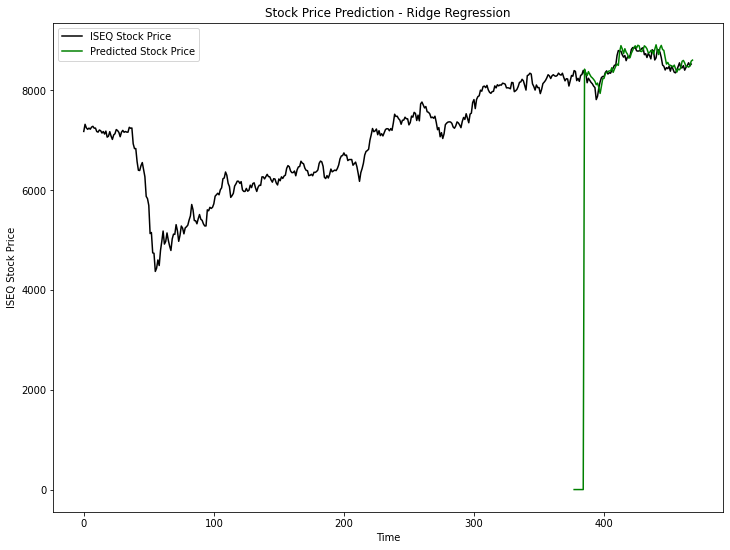

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

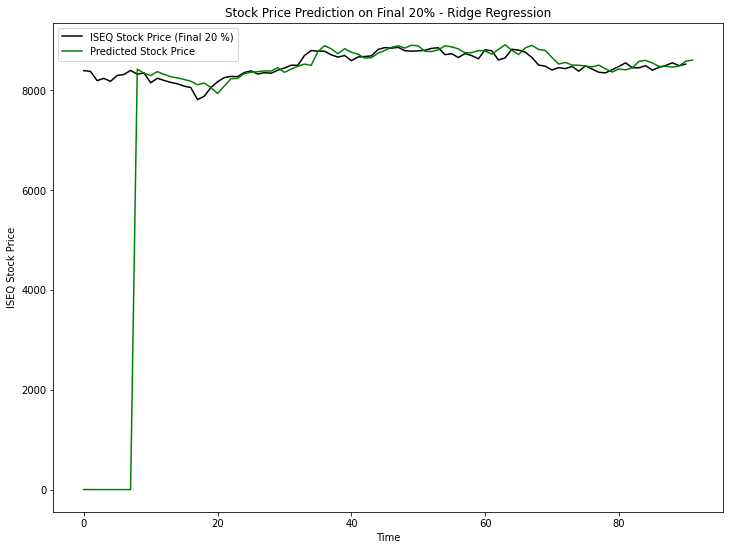

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [26]:
#We visualise the original data vs the Prediction of the final 20% of the stock data
prediction = scl.inverse_transform(shape_r)
prediction_main = np.zeros([469, 1], dtype = float) 
for i in range(0, 377):
    prediction_main[i] = None

for i in range(385, 469):
    prediction_main[i] = prediction[i - 385]

final40 = np.zeros([188, 1], dtype = float) 
for i in range(281, 468):
    final40[i-281] = stock[i]  
    
prediction_main2 = np.zeros([92, 1], dtype = float) 
for i in range(0, 92):
    prediction_main2[i] = prediction_main[i+377]

fig, ax = plt.subplots(figsize=(12,9))
plt.plot(stock, color = 'black', label = 'ISEQ Stock Price')
plt.plot(prediction_main, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction - Ridge Regression')
#plt.title('Stock Price Prediction after 100 Epochs in training')
plt.xlabel('Time')
plt.ylabel('ISEQ Stock Price')
plt.legend()
plt.show()
plt.savefig('Ridge_Prediction.png')
files.download('Ridge_Prediction.png')

fig, ax = plt.subplots(figsize=(12,9))    
plt.plot(stock[377:469, :], color='black', label='ISEQ Stock Price (Final 20 %)')
plt.plot(prediction_main2, color='green', label='Predicted Stock Price')
plt.title('Stock Price Prediction on Final 20% - Ridge Regression')
plt.xlabel('Time')
plt.ylabel('ISEQ Stock Price')
plt.legend()
plt.show()
plt.savefig('Ridge20.png')
files.download('Ridge20.png')